## Import Library

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pylab as plt

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [16]:
df_train = pd.read_csv("trainset.csv")
df_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [17]:
np.array(df_train.Date.iloc[800:].values).shape

(459,)

In [18]:
df_train[800:]

,Date,Open,High,Low,Close,Adj Close,Volume
800,2016-03-08,688.590027,703.789978,685.340027,693.969971,693.969971,2076300
801,2016-03-09,698.469971,705.679993,694.000000,705.239990,705.239990,1421500
802,2016-03-10,708.119995,716.440002,703.359985,712.820007,712.820007,2829400
803,2016-03-11,720.000000,726.919983,717.125000,726.820007,726.820007,1970800
804,2016-03-14,726.809998,735.500000,725.150024,730.489990,730.489990,1718300
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [19]:
training_set1 = df_train.iloc[:800, 1:2].values
training_set1.shape

(800, 1)

## Train Test Split

(800, 1)


Text(0,0.5,'Price')

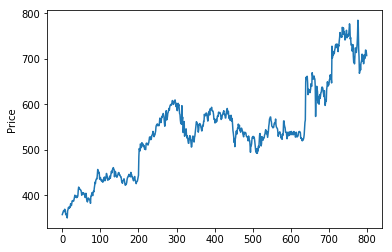

In [20]:
training_data = df_train.iloc[:,1:2]
training_set = training_data[0:800]
test_set      = training_data[800:]
print(training_set.shape)
plt.plot(training_set)
plt.ylabel('Price')

In [21]:
training_set

,Open
0,357.385559
1,360.122742
2,362.313507
3,365.348755
4,365.393463
...,...
795,703.619995
796,719.000000
797,718.679993
798,714.989990


## Data Normalization

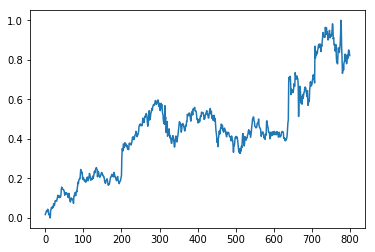

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
training_data_scaled = mms.fit_transform(training_set)
plt.plot(training_data_scaled)

In [23]:
print(np.array([training_data_scaled[60:65,0]]))

[[0.10331084 0.11420797 0.12440757 0.11387634 0.09307696]]


In [24]:
# Create trainind data x_train with window/history of 60 samples and y_train with one future sample. 

def create_train_test_data(training_data_scaled,window,lag=0):
    x_train= []
    y_train= []
  
    for i in range(60,training_data_scaled.shape[0]):
        x_train.append(training_data_scaled[i-60:i,0])
        y_train.append(training_data_scaled[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    print('x_train shape: ',x_train.shape)
    print('y_train shape: ',y_train.shape)
    return x_train ,y_train

In [25]:
x_train,y_train =create_train_test_data(training_data_scaled,60)
x_train.shape[0]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train shape:  (740, 60)
y_train shape:  (740,)


In [26]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
740/740 [==============================] - 12s 16ms/step - loss: 0.0516
Epoch 2/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0093
Epoch 3/100
740/740 [==============================] - 6s 8ms/step - loss: 0.0070
Epoch 4/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0063
Epoch 5/100
740/740 [==============================] - 6s 8ms/step - loss: 0.0057
Epoch 6/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0062
Epoch 7/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0058
Epoch 8/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0056
Epoch 9/100
740/740 [==============================] - 6s 8ms/step - loss: 0.0061
Epoch 10/100
740/740 [==============================] - 5s 7ms/step - loss: 0.0065
Epoch 11/100
740/740 [==============================] - 6s 7ms/step - loss: 0.0049
Epoch 12/100
740/740 [==============================] - 6s 8ms/step - loss: 0.0053
Epoch 13/10

In [27]:
model.save("my_h5_model.h5")

In [28]:
test_set.size

459

In [30]:
inputs = mms.transform(test_set)
X_test = []
for i in range(60,459):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [31]:
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
X_test.shape

(399, 60)

In [33]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = mms.inverse_transform(predicted_stock_price)

In [34]:
#predicted_stock_price.shape[1]

predicted_stock_price = np.reshape(predicted_stock_price,(predicted_stock_price.shape[0],))
predicted_stock_price.shape
predicted_stock_price

array([ 732.1575 ,  733.4113 ,  732.719  ,  730.5636 ,  727.5948 ,
        726.58594,  727.06476,  727.255  ,  726.4042 ,  725.34186,
        725.2557 ,  724.72723,  722.37335,  717.39374,  712.54663,
        709.7028 ,  708.3819 ,  702.8286 ,  695.04926,  690.4053 ,
        690.1607 ,  692.52075,  696.3209 ,  700.093  ,  700.7714 ,
        701.0197 ,  701.65814,  704.2998 ,  709.9272 ,  716.36273,
        720.272  ,  722.58234,  723.13007,  724.7949 ,  728.96515,
        734.0283 ,  738.18414,  740.32886,  740.70435,  740.39465,
        742.56775,  752.4262 ,  759.4806 ,  763.7545 ,  765.32495,
        766.9582 ,  769.02625,  773.08997,  776.5942 ,  779.4039 ,
        781.6128 ,  782.17773,  782.8058 ,  782.7642 ,  781.90405,
        782.04144,  781.4923 ,  780.39636,  780.207  ,  779.2519 ,
        777.2143 ,  775.9984 ,  775.5806 ,  775.64557,  775.08374,
        774.8604 ,  775.8442 ,  776.9874 ,  779.31537,  780.81506,
        778.92004,  772.3502 ,  768.90845,  767.4882 ,  768.07

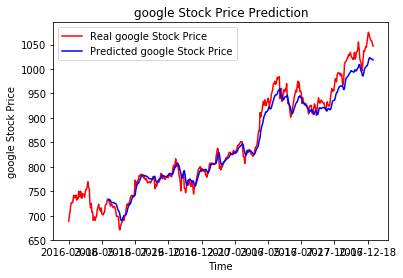

In [35]:
# Visualising the results
plt.plot(df_train.Date[800:].values,test_set, color = "red", label = "Real google Stock Price")
plt.plot(df_train.Date[860:].values,predicted_stock_price, color = "blue", label = "Predicted google Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('google Stock Price')
plt.legend()
plt.show()